# ANOVA Test
ANOVA (or ANalysis Of VAriance) is a technique meant to compare the means of three or more independent samples. An example of when we might use ANOVA is when conducting a test on an e-commerce website and trying out multiple UI designs at once to see if there is a change in sales.

The ANOVA test has **important assumptions that must be satisfied** in order for the associated p-value to be valid.
   1. The samples are independent.
   2. Each sample is from a normally distributed population.
   3. The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

If these assumptions are not true for a given set of data, it may still be possible to use the **Kruskal-Wallis H-test (scipy.stats.kruskal)** although with some loss of power.


In [9]:
## ANOVA Test example.
# We have a bank that gives money with slightly different interests depending on the city. 
# Are credit interests outcomes extracted from the same population?

# The difference between t-test and ANOVA is the former is ued to compare two groups whereas
# the latter is used to compare three or more groups.

from scipy.stats import f_oneway
import pandas as pd

rate = pd.read_csv('data/rate_by_city.csv')
display(rate.head(10))
rate['city_count'] = rate.groupby('City').cumcount()
rate_pivot = rate.pivot(index='city_count', columns='City', values='Rate')
rate_pivot.columns = ['City_'+str(x) for x in rate_pivot.columns.values]

display(rate_pivot.head())

analyisVars = [
    rate_pivot.City_1,
    rate_pivot.City_2,
    rate_pivot.City_3,
    rate_pivot.City_4,
    rate_pivot.City_5,
    rate_pivot.City_6
]

print("If your p-value is less than 0.05, you can declare the null-hypothesis is rejected")
f_oneway(*analyisVars)

,Rate,City
0,13.75,1
1,13.75,1
2,13.50,1
3,13.50,1
4,13.00,1
5,13.00,1
6,13.00,1
7,12.75,1
8,12.50,1
9,14.25,2


,City_1,City_2,City_3,City_4,City_5,City_6
city_count,,,,,,
0,13.75,14.25,14.00,15.00,14.50,13.50
1,13.75,13.00,14.00,14.00,14.00,12.25
2,13.50,12.75,13.51,13.75,14.00,12.25
3,13.50,12.50,13.50,13.59,13.90,12.00
4,13.00,12.50,13.50,13.25,13.75,12.00


If your p-value is less than 0.05, you can declare the null-hypothesis is rejected


F_onewayResult(statistic=4.8293848737024, pvalue=0.001174551414504048)

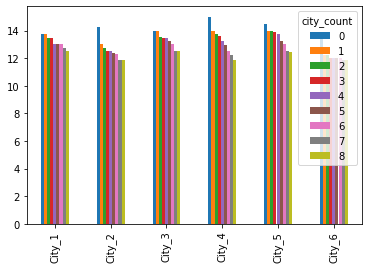

In [18]:
%matplotlib inline
rate_pivot.T.plot.bar()

In [12]:
## EXAMPLE 2 - Same as previous
# In this case, we prefer not to pivot our data since the library will do it for us.
# The pivoting is performed internally by using the C function

from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols('Rate ~ C(City)', data=rate).fit()

# Our result is the same p-value and our conclusion to reject remains the same.
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(City),10.945667,5.0,4.829385,0.001175
Residual,21.758133,48.0,NaN,NaN


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead o

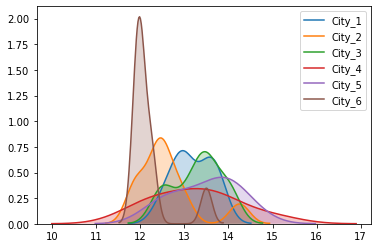

In [19]:
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot
import seaborn as sns

for col in analyisVars:
    sns.kdeplot(col,shade=True)


(array([4.90000e+01, 1.46800e+03, 2.00000e+04, 1.16957e+05, 3.00982e+05,
        3.44274e+05, 1.73439e+05, 3.87710e+04, 3.88500e+03, 1.75000e+02]),
 array([-4.82546306, -3.89056122, -2.95565938, -2.02075753, -1.08585569,
        -0.15095384,  0.783948  ,  1.71884984,  2.65375169,  3.58865353,
         4.52355537]),
 <a list of 10 Patch objects>)

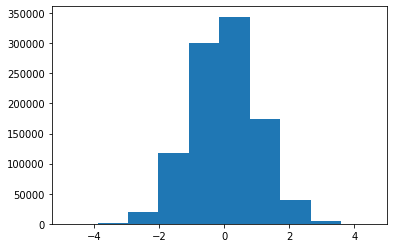

In [31]:
import matplotlib.pyplot as plt
import numpy as np
a = np.random.randn(1000000)
plt.hist(a)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


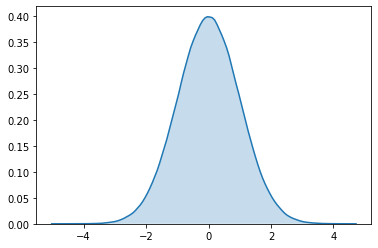

In [32]:
sns.kdeplot(a,shade=True)